<a href="https://colab.research.google.com/github/debojit10/ASL_detecto/blob/main/ASL_detecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L "https://public.roboflow.com/ds/cYPeTvbat0?key=sMaxIzCcax" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [1]:
!pip install detecto

In [2]:
import matplotlib.pyplot as plt
from detecto.utils import read_image
from torchvision import transforms
from detecto.utils import normalize_transform
from detecto.core import Dataset
from detecto.visualize import show_labeled_image
from detecto.core import DataLoader, Model
from detecto.visualize import plot_prediction_grid, detect_video, detect_live
import string

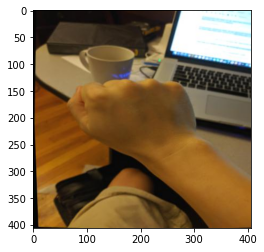

In [ ]:
image = read_image('/content/train/A0_jpg.rf.a79ace20ea42b8f94360cef8aaec4030.jpg')
plt.imshow(image)
plt.show()

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    # Note: all images with a size smaller than 800 will be scaled up in size
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.2),
    transforms.ToTensor(),  # required
    normalize_transform(),  # required
])

In [ ]:
# If your images and labels are in the same folder
train_dataset = Dataset('/content/train/',transform=custom_transforms)
valid_dataset = Dataset('/content/valid/')
test_dataset = Dataset('/content/test/')

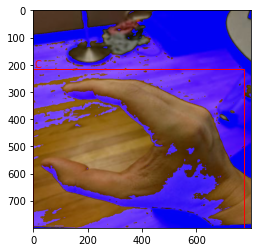

In [ ]:
image, targets = train_dataset[420]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [3]:
labels = list(string.ascii_uppercase)

In [ ]:
# Specify all unique labels you're trying to predict
model = Model(labels)

# Alternatively, provide your own DataLoader to the fit method
loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
model.fit(loader, valid_dataset, epochs=10, verbose=True)

In [ ]:
model.save('model.pth')

In [7]:
model = Model.load('/content/detecto/model.pth', labels)

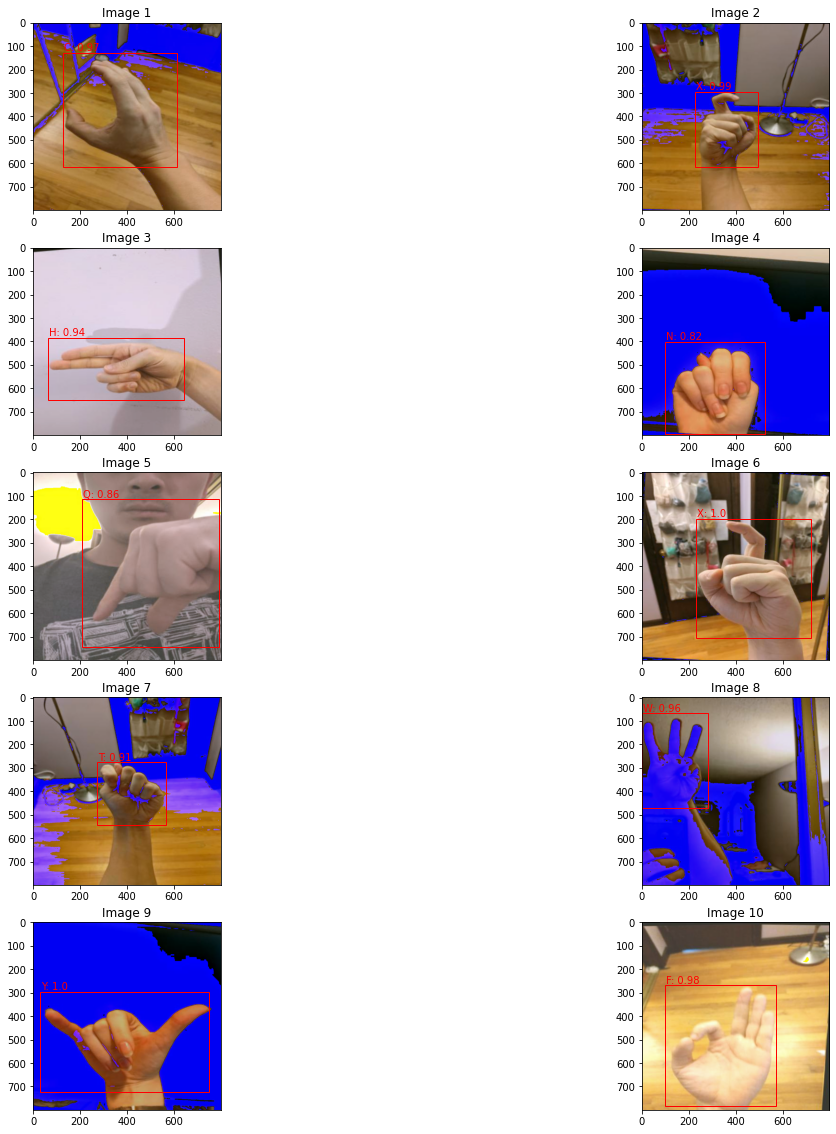

In [ ]:
images = []
for i in range(10):
    image, _ = train_dataset[i]
    images.append(image)

plot_prediction_grid(model, images, dim=(5, 2), figsize=(20, 20))